## Working with MNIST Digits Dataset

MNIST stands for the Modified National Institute of Standards and Technology (database/dataset). 

![MNIST Digits.png](<attachment:MNIST Digits.png>)
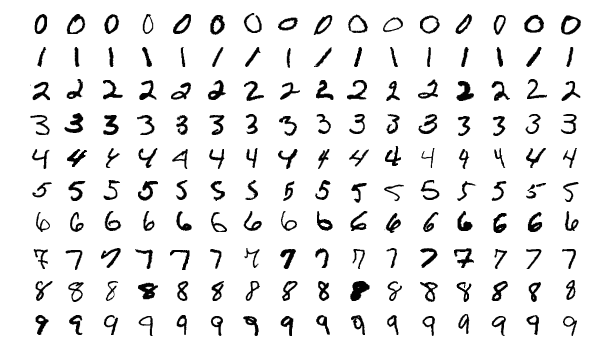

![MNIST working2.PNG](<attachment:MNIST working2.PNG>)
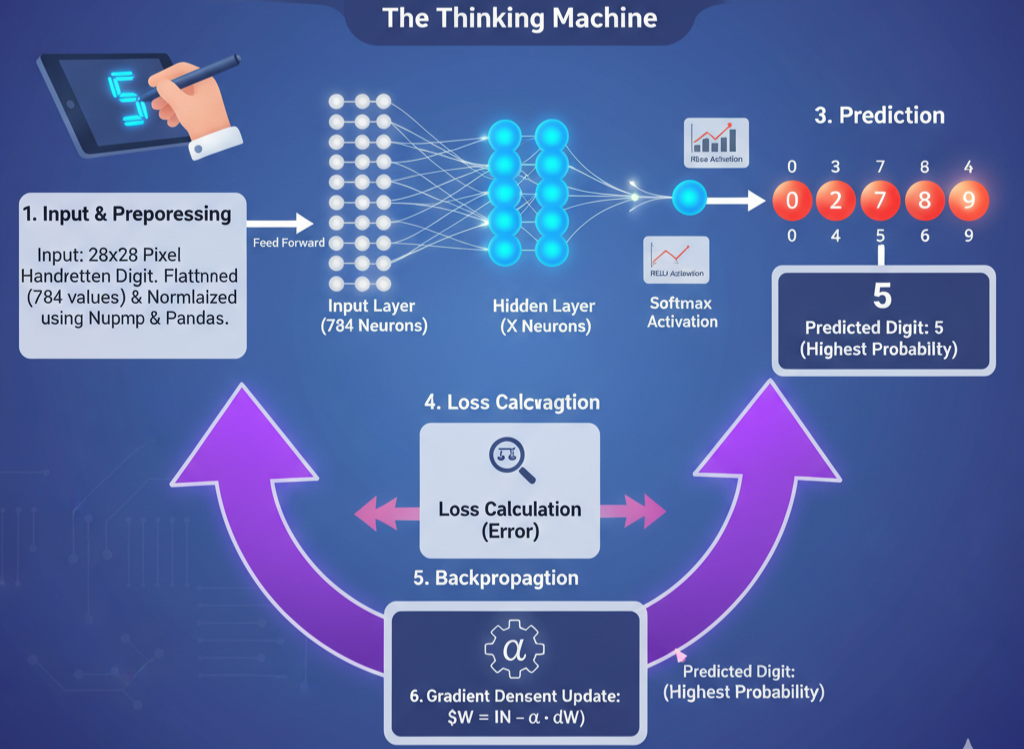

## 1. Importing Necessary Libraries

In [ ]:
import numpy as np  # Imports numpy for numerical computations and array operations
import pandas as pd  # Imports pandas for reading CSV files and data manipulation
from matplotlib import pyplot as plt  # Imports matplotlib pyplot for data visualization

-   `numpy`: Used for numerical computations (matrix operations, random initialization, etc.).
-   `pandas`: Used to read the MNIST dataset from a CSV file.
-   `matplotlib.pyplot`: Used for visualizing handwritten digits from the dataset.

In [ ]:
# Load the dataset
# MNIST dataset should be stored in 'MNIST_Dataset.csv'
data = pd.read_csv('MNIST_Dataset.csv')  # Reads the MNIST CSV file into a pandas DataFrame

-   Reads the MNIST dataset from a CSV file.
-   Converts the dataset into a NumPy array for efficient numerical processing.
-   Stores the number of rows (`m`, representing total samples) and columns (`n`, representing 1 label + 784 pixel values per sample).


In [ ]:
# Convert pandas DataFrame to numpy array
data = np.array(data)  # Converts the pandas DataFrame into a NumPy array for efficient processing
m, n = data.shape  # Gets the number of rows (m = samples) and columns (n = features + label)

In [ ]:
print(m,n)  # Prints the number of samples (m) and features (n)
print(f"Dataset shape: {m} samples, {n} features")  # Displays the dataset shape in a formatted message

42000 785
Dataset shape: 42000 samples, 785 features


In [ ]:
print("Checking for NaN values...")  # Prints a status message before checking for missing values
nan_mask = np.isnan(data).any(axis=1)  # Creates a boolean mask identifying rows with NaN values
if nan_mask.any():  # If any rows contain NaN values
    print(f"Found {nan_mask.sum()} rows with NaN values. Removing them...")  # Displays the count of rows with NaN values
    data = data[~nan_mask]  # Removes rows containing NaN values from the dataset
    print(f"Remaining samples: {data.shape[0]}")  # Prints the count of remaining samples after removing NaN rows

Checking for NaN values...
Found 1 rows with NaN values. Removing them...
Remaining samples: 41999


In [ ]:
# Shuffle the dataset to ensure randomness before splitting
np.random.shuffle(data)  # Randomly shuffles the dataset rows to ensure model doesn't memorize order patterns

# Randomly shuffles the dataset to ensure the model doesn't learn patterns based on order.

In [ ]:
# Split into development (dev) and training sets
# First 1000 examples for development/testing
data_dev = data[0:1000].T  # Selects first 1000 samples and transposes for neural network format
Y_dev = data_dev[0]  # Extracts labels (first row after transpose)
Y_dev = np.nan_to_num(Y_dev, nan=0).astype(int)  # Converts NaN values to 0 and ensures integer type
X_dev = data_dev[1:n]  # Extracts feature data (pixel values from row 1 onwards)
X_dev = X_dev / 255.  # Normalizes pixel values from 0-255 range to 0-1 range for better training

'''
The first 1000 samples are assigned to the development (dev) set.
Y_dev stores labels (0-9 digits).
X_dev stores pixel data and is normalized to keep values between 0 and 1.
'''

'\nThe first 1000 samples are assigned to the development (dev) set.\nY_dev stores labels (0-9 digits).\nX_dev stores pixel data and is normalized to keep values between 0 and 1.\n'

In [ ]:
# Remaining data for training
data_train = data[1000:m].T  # Selects samples from index 1000 onwards and transposes for neural network format
Y_train = data_train[0]  # Extracts labels (first row after transpose)
X_train = data_train[1:n]  # Extracts feature data (pixel values from row 1 onwards)
X_train = X_train / 255.  # Normalizes pixel values from 0-255 range to 0-1 range
_, m_train = X_train.shape  # Gets the number of training examples (number of columns)

'''
The remaining samples are assigned to the training set.
m_train stores the number of training samples.
'''
print(f"Training samples: {m_train}")  # Prints the number of training samples
print(f"Dev samples: {len(Y_dev)}")  # Prints the number of development samples

Training samples: 40999
Dev samples: 1000


### Initializing Neural Network Parameters

In [ ]:
# Initialize parameters (weights and biases) for a 2-layer neural network
def init_params():  # Defines a function to initialize all network parameters
    W1 = np.random.rand(10, 784) - 0.5  # Initializes weights for hidden layer (10 neurons, 784 inputs) with random values between -0.5 and 0.5
    b1 = np.random.rand(10, 1) - 0.5  # Initializes biases for hidden layer (10 values) with random values between -0.5 and 0.5
    W2 = np.random.rand(10, 10) - 0.5  # Initializes weights for output layer (10 neurons, 10 inputs from hidden layer) with random values between -0.5 and 0.5
    b2 = np.random.rand(10, 1) - 0.5  # Initializes biases for output layer (10 values) with random values between -0.5 and 0.5
    return W1, b1, W2, b2  # Returns all initialized parameters

-   Initializes weights (`W1`, `W2`) and biases (`b1`, `b2`) with random values.
-   Layer 1: 10 neurons, input size 784 (28×28 pixels).
-   Layer 2: 10 neurons (output layer for 10 classes, digits 0-9).
---


In [ ]:
# Activation function: ReLU (Rectified Linear Unit)
def ReLU(Z):  # Defines the ReLU activation function
    return np.maximum(Z, 0)  # Returns the maximum between Z and 0 (element-wise), converting negative values to 0

In [ ]:
# Activation function: Softmax (for multi-class classification)
def softmax(Z):  # Defines the softmax activation function to convert outputs to probabilities
    A = np.exp(Z) / sum(np.exp(Z))  # Computes exponential of Z divided by sum of all exponentials, normalizing to probability distribution
    return A  # Returns the probability distribution

# Converts outputs into probabilities by normalizing exponentiated values.

In [ ]:
# Forward propagation: Computes activations through the network
def forward_prop(W1, b1, W2, b2, X):  # Defines forward propagation function that computes outputs given inputs
    Z1 = W1.dot(X) + b1  # Linear transformation for first layer (matrix multiplication + bias)
    A1 = ReLU(Z1)  # Applies ReLU activation function to first layer output
    Z2 = W2.dot(A1) + b2  # Linear transformation for second layer using first layer activation
    A2 = softmax(Z2)  # Applies softmax activation to output layer for probability distribution
    return Z1, A1, Z2, A2  # Returns all intermediate values for use in backpropagation

-   **Layer 1**:
    -   `Z1 = W1.dot(X) + b1` (Linear transformation).
    -   `A1 = ReLU(Z1)` (Activation function).
-   **Layer 2**:
    -   `Z2 = W2.dot(A1) + b2` (Linear transformation).
    -   `A2 = softmax(Z2)` (Convert to probability distribution).
---

In [ ]:
# Derivative of ReLU function
def ReLU_deriv(Z):  # Defines the derivative of ReLU function for backpropagation
    return Z > 0  # Returns a boolean array: 1 if Z > 0, otherwise 0 (True/False converted to 1/0)

In [ ]:
# Convert labels into one-hot encoding
# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     return one_hot_Y.T

# Converts digit labels into one-hot encoded vectors.

In [ ]:
def one_hot(Y):  # Defines function to convert labels to one-hot encoding
    # Ensure Y is integer type and handle NaN
    Y = np.nan_to_num(Y, nan=0).astype(int)  # Converts NaN values to 0 and ensures integer type for label indices
    # Clip values to valid range (0-9 for MNIST)
    Y = np.clip(Y, 0, 9)  # Ensures all label values are within valid MNIST range (0-9)
    num_classes = 10  # Sets number of classes for MNIST (digits 0-9)
    one_hot_Y = np.zeros((Y.size, num_classes))  # Creates a matrix of zeros with shape (num_samples, 10)
    one_hot_Y[np.arange(Y.size), Y] = 1  # Sets 1 at the position corresponding to each label (one-hot encoding)
    return one_hot_Y.T  # Returns transposed one-hot matrix for use in loss computation

In [ ]:
# Backpropagation: Compute gradients to update parameters
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):  # Defines backpropagation function to compute gradients
    one_hot_Y = one_hot(Y)  # Converts labels to one-hot representation
    dZ2 = A2 - one_hot_Y  # Computes error at output layer (difference between predictions and actual labels)
    dW2 = 1 / m_train * dZ2.dot(A1.T)  # Computes gradient for W2 using chain rule
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)  # Computes gradient for b2 by averaging across samples
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)  # Computes error at hidden layer using ReLU derivative
    dW1 = 1 / m_train * dZ1.dot(X.T)  # Computes gradient for W1 using chain rule
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)  # Computes gradient for b1 by averaging across samples
    return dW1, db1, dW2, db2  # Returns all computed gradients

# Computes gradients (dW1, db1, dW2, db2) for parameter updates.

In [ ]:
# Update parameters using gradient descent
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):  # Defines function to update parameters using gradients
    W1 = W1 - alpha * dW1  # Updates W1 by subtracting learning rate times gradient
    b1 = b1 - alpha * db1  # Updates b1 by subtracting learning rate times gradient
    W2 = W2 - alpha * dW2  # Updates W2 by subtracting learning rate times gradient
    b2 = b2 - alpha * db2  # Updates b2 by subtracting learning rate times gradient
    return W1, b1, W2, b2  # Returns updated parameters

In [ ]:
# Predict the class label based on probabilities
def get_predictions(A2):  # Defines function to extract predicted class from output probabilities
    return np.argmax(A2, axis=0)  # Returns the index of the maximum probability (predicted class) for each sample

In [ ]:
# Compute accuracy of the model
def get_accuracy(predictions, Y):  # Defines function to calculate model accuracy
    print(predictions, Y)  # Prints predictions and actual labels for debugging
    return np.sum(predictions == Y) / Y.size  # Returns the proportion of correct predictions (accuracy)

In [ ]:
# Training loop using gradient descent
def gradient_descent(X, Y, alpha, iterations):  # Defines the main training function using gradient descent
    W1, b1, W2, b2 = init_params()  # Initializes all network parameters randomly
    for i in range(iterations):  # Loops through the specified number of training iterations
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)  # Performs forward propagation to get predictions
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)  # Computes gradients using backpropagation
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)  # Updates parameters using gradient descent
        if i % 10 == 0:  # Prints progress every 10 iterations
            print("Iteration: ", i)  # Prints current iteration number
            predictions = get_predictions(A2)  # Gets predictions from current model
            print(get_accuracy(predictions, Y))  # Prints accuracy of current model
    return W1, b1, W2, b2  # Returns trained parameters

In [ ]:
# Function to make predictions
def make_predictions(X, W1, b1, W2, b2):  # Defines function to make predictions on new data using trained parameters
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)  # Performs forward propagation (only A2 output is needed)
    return get_predictions(A2)  # Returns predicted class labels

In [ ]:
# Function to test predictions on a single example
def test_prediction(index, W1, b1, W2, b2):  # Defines function to test prediction on a single image and visualize it
    current_image = X_train[:, index, None]  # Selects a single image by column index (with None adds dimension)
    prediction = make_predictions(current_image, W1, b1, W2, b2)  # Gets the model's prediction for this image
    label = Y_train[index]  # Gets the actual label for this image
    print("Prediction: ", prediction)  # Prints the predicted digit
    print("Label: ", label)  # Prints the actual digit label
    
    current_image = current_image.reshape((28, 28)) * 255  # Reshapes flattened 784-value array back to 28x28 image and rescales to 0-255
    plt.gray()  # Sets the colormap to grayscale
    plt.imshow(current_image, interpolation='nearest')  # Displays the image
    plt.show()  # Shows the plotted image

In [ ]:
# Train the model with learning rate 0.1 and 500 iterations/epochs
#W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
print("\\n" + "="*50)  # Prints a decorative line separator
print("Training the model...")  # Prints status message
print("="*50)  # Prints a decorative line separator
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)  # Trains the model with learning rate 0.1 for 500 iterations


Training the model...
Iteration:  0
[5 5 5 ... 5 5 5] [9. 0. 3. ... 7. 7. 4.]
0.09300226834800848
Iteration:  10
[6 3 4 ... 1 4 9] [9. 0. 3. ... 7. 7. 4.]
0.16410156345276714
Iteration:  20
[6 3 4 ... 1 4 6] [9. 0. 3. ... 7. 7. 4.]
0.23681065391838826
Iteration:  30
[6 0 4 ... 9 4 6] [9. 0. 3. ... 7. 7. 4.]
0.28329959267299204
Iteration:  40
[6 0 4 ... 9 7 6] [9. 0. 3. ... 7. 7. 4.]
0.3225200614649138
Iteration:  50
[6 0 8 ... 9 7 6] [9. 0. 3. ... 7. 7. 4.]
0.3629844630356838
Iteration:  60
[6 0 8 ... 9 7 6] [9. 0. 3. ... 7. 7. 4.]
0.4076196980414156
Iteration:  70
[6 0 8 ... 9 7 6] [9. 0. 3. ... 7. 7. 4.]
0.4593282762994219
Iteration:  80
[6 0 8 ... 7 7 6] [9. 0. 3. ... 7. 7. 4.]
0.4989877801897607
Iteration:  90
[6 0 8 ... 7 7 6] [9. 0. 3. ... 7. 7. 4.]
0.5295495012073466
Iteration:  100
[6 0 8 ... 7 7 6] [9. 0. 3. ... 7. 7. 4.]
0.5585258177028708
Iteration:  110
[6 0 8 ... 7 7 6] [9. 0. 3. ... 7. 7. 4.]
0.5837459450230493
Iteration:  120
[6 0 8 ... 7 7 4] [9. 0. 3. ... 7. 7. 4.]
0.


Testing predictions...
Prediction:  [9]
Label:  9.0


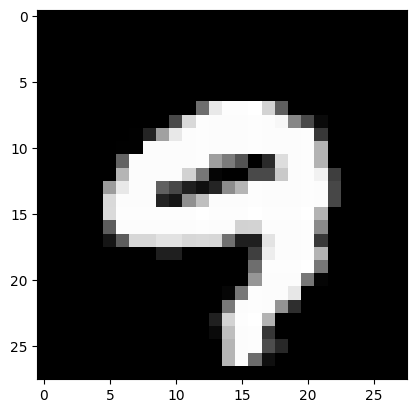

Prediction:  [0]
Label:  0.0


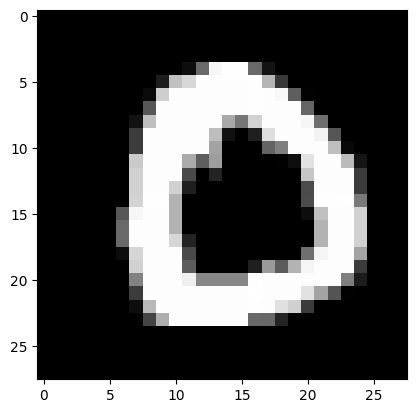

Prediction:  [3]
Label:  3.0


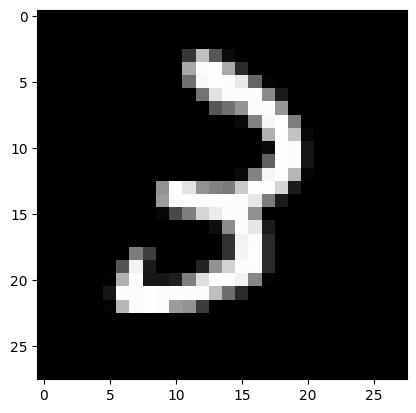

In [ ]:
# Test model predictions
#test_prediction(256, W1, b1, W2, b2)
# test_prediction(1, W1, b1, W2, b2)
# test_prediction(2, W1, b1, W2, b2)
# test_prediction(3, W1, b1, W2, b2)

print("\\n" + "="*50)  # Prints a decorative line separator
print("Testing predictions...")  # Prints status message
print("="*50)  # Prints a decorative line separator
for i in range(3):  # Loops through 3 test samples
    test_prediction(i, W1, b1, W2, b2)  # Tests prediction on the i-th training sample and displays the image

In [ ]:
# Evaluate accuracy on development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)  # Makes predictions on the development set using trained model
print("Dev Set Accuracy:", get_accuracy(dev_predictions, Y_dev))  # Computes and prints accuracy on the development set

[7 6 1 4 0 3 2 4 3 8 1 2 6 2 3 6 8 3 2 8 3 9 1 3 0 9 5 4 2 9 7 6 2 6 3 0 7
 6 1 4 8 1 9 7 3 5 4 0 9 1 2 3 7 6 9 8 9 1 9 2 0 1 9 1 1 7 2 8 8 4 5 6 6 9
 2 5 0 9 3 2 8 1 3 1 4 8 1 0 9 4 5 6 3 3 1 0 5 0 0 1 5 3 4 9 3 2 3 1 3 9 9
 2 6 7 9 1 9 9 0 7 5 2 5 0 0 4 1 2 1 6 4 6 1 5 3 6 6 2 5 8 7 6 7 2 1 0 2 3
 1 5 1 0 3 4 7 0 1 0 6 9 1 0 8 5 6 3 1 6 6 7 5 8 0 1 2 7 5 0 1 6 7 9 0 7 2
 4 7 6 7 9 2 3 2 3 3 0 4 0 5 3 0 6 4 0 7 5 2 1 7 9 1 9 7 0 1 4 5 0 1 3 3 0
 4 7 2 6 1 0 5 6 7 1 4 2 8 7 8 8 0 9 3 7 5 7 3 5 9 4 6 3 0 3 7 4 3 2 7 0 8
 1 2 7 6 1 7 0 3 5 8 9 9 9 4 1 4 9 3 9 9 9 7 5 4 4 3 1 2 6 9 8 3 9 6 0 8 0
 9 1 1 8 9 0 6 9 8 3 8 6 4 1 7 4 1 9 1 8 0 9 2 4 7 3 6 1 4 2 4 9 3 0 1 3 2
 2 0 6 7 0 0 5 3 8 5 0 2 1 6 2 0 5 3 0 1 7 9 6 4 6 0 1 1 0 8 9 2 8 3 8 1 5
 6 8 0 7 5 1 9 2 8 0 6 1 2 8 9 3 3 0 1 8 8 8 3 1 4 4 3 8 4 4 7 4 8 8 8 1 0
 4 8 9 0 2 8 0 9 6 8 5 0 5 3 5 0 8 6 2 0 0 0 2 0 0 5 5 6 9 9 8 0 3 1 9 9 0
 2 0 9 3 7 5 9 2 8 5 9 0 7 9 4 7 1 7 9 6 7 7 6 3 3 5 1 7 9 8 8 3 1 8 9 8 4
 6 3 5 8 1 9 9 0 0 5 3 6 

## **Summary**

-   A **2-layer neural network** trained on MNIST.
-   Uses **ReLU & softmax** activations.
-   Uses **gradient descent** to update weights.
-   Can classify **handwritten digits (0-9)**.
---

## **MNIST 3D View**
https://colah.github.io/posts/2014-10-Visualizing-MNIST/

Visualizing MNIST as a Graph in 3D

https://colah.github.io/